In [1]:
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
# load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

print(df.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


### 2. Buatlah scatterplot untuk memvisualisasikan hubungan antara fitur MedInc dengan PRICE. Berikan judul dan label yang jelas pada plot.

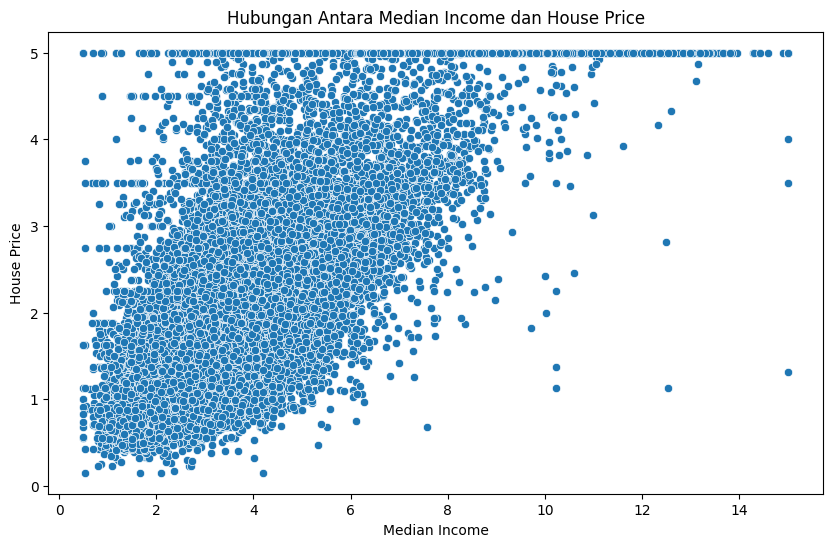

In [3]:
plt.figure(figsize=(10,6))
sns.scatterplot(data= df, x='MedInc', y='PRICE')
plt.title('Hubungan Antara Median Income dan House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()

### 3. Buat Model Sederhana, definisikan X hanya dengan fitur MedInc dan y sebagai PRICE.

In [4]:
# X = hanya fitur MedInc
# y = PRICE
X = df[['MedInc']]
y = df['PRICE']


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

print("=== PEMBAGIAN DATA ===")
print("Ukuran data training :", len(X_train))
print("Ukuran data testing  :", len(X_test))


=== PEMBAGIAN DATA ===
Ukuran data training : 16512
Ukuran data testing  : 4128


### 5. Latih model LinearRegression pada data training yang sederhana.

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

print("=== HASIL MODEL LINEAR REGRESSION ===")
print(f"Intercept (β₀): {model.intercept_:.4f}")
print(f"Koefisien (β₁): {model.coef_[0]:.4f}")


=== HASIL MODEL LINEAR REGRESSION ===
Intercept (β₀): 0.4446
Koefisien (β₁): 0.4193


### 6. Buat prediksi pada data testing, lalu hitung dan cetak nilai RMSE serta R2 untuk model ini. Catat dan jelaskan hasilnya.

In [7]:
# Prediksi pada data testing
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("=== HASIL EVALUASI MODEL SEDERHANA ===")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

=== HASIL EVALUASI MODEL SEDERHANA ===
Root Mean Squared Error (RMSE): 0.8421
R-squared (R²): 0.4589


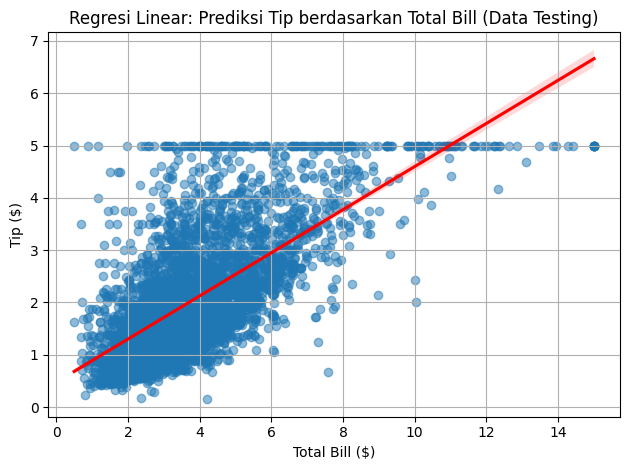

In [17]:
sns.regplot(x= X_test["MedInc"], y= y_test, line_kws={"color": "red"}, scatter_kws={"alpha":0.5})
plt.title('Regresi Linear: Prediksi Tip berdasarkan Total Bill (Data Testing)')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.grid(True)
plt.tight_layout()

plt.show()

### 7. Buat Model Kompleks: Definisikan ulang X untuk menyertakan semua kolom fitur yang tersedia (kecuali PRICE).

In [18]:
# Definisikan X dan y untuk model kompleks (semua fitur kecuali PRICE)
X = df.drop(columns=['PRICE'])
y = df['PRICE']


### 8. Bagi kembali data (dengan semua fitur) menjadi training set (80%) dan testing set (20%), menggunakan random_state=42.

In [19]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)

### 9. Latih model LinearRegression yang baru pada data training yang kompleks.

In [20]:
model2 = LinearRegression()
model2.fit(X_train2, y_train2)

y_pred2 = model2.predict(X_test2)

rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r2_2 = r2_score(y_test2, y_pred2)

print("=== HASIL EVALUASI MODEL KOMPLEKS ===")
print(f"Root Mean Squared Error (RMSE): {rmse2:.4f}")
print(f"R-squared (R²): {r2_2:.4f}")

=== HASIL EVALUASI MODEL KOMPLEKS ===
Root Mean Squared Error (RMSE): 0.7456
R-squared (R²): 0.5758


### 10. Buat prediksi pada data testing, lalu hitung dan cetak nilai RMSE serta R2 untuk model kompleks ini.

In [25]:
# Prediksi pada testing set (model kompleks)
y_pred2 = model2.predict(X_test2)

# Hitung metrik
rmse2 = np.sqrt(mean_squared_error(y_test2, y_pred2))
r2_2 = r2_score(y_test2, y_pred2)

print("\n=== Evaluasi Model Kompleks ===")
print(f"Root Mean Squared Error (RMSE): {rmse2:.4f}")
print(f"R-squared (R²): {r2_2:.4f}")



=== Evaluasi Model Kompleks ===
Root Mean Squared Error (RMSE): 0.7456
R-squared (R²): 0.5758


### 11. Bandingkan kedua model. Berdasarkan nilai RMSE dan R2 yang Anda dapatkan, jawab pertanyaan berikut:

In [12]:
# Anggap model (sederhana) = model dan model kompleks = model2
# dan kamu sudah punya y_test (sederhana) serta y_test2 (kompleks)
y_pred_simple = model.predict(X_test)
rmse_simple = np.sqrt(mean_squared_error(y_test, y_pred_simple))
r2_simple = r2_score(y_test, y_pred_simple)

y_pred_complex = model2.predict(X_test2)
rmse_complex = np.sqrt(mean_squared_error(y_test2, y_pred_complex))
r2_complex = r2_score(y_test2, y_pred_complex)

print("=== Perbandingan Model ===")
print(f"Model Sederhana (MedInc): RMSE = {rmse_simple:.4f}, R² = {r2_simple:.4f}")
print(f"Model Kompleks (semua fitur): RMSE = {rmse_complex:.4f}, R² = {r2_complex:.4f}")


=== Perbandingan Model ===
Model Sederhana (MedInc): RMSE = 0.8421, R² = 0.4589
Model Kompleks (semua fitur): RMSE = 0.7456, R² = 0.5758


#### Model manakah yang memberikan hasil lebih baik? Mengapa demikian?
Setelah membandingkan kedua model, model kompleks (menggunakan semua fitur) memberikan hasil yang lebih baik dibanding model sederhana (hanya MedInc). Pada data testing model kompleks diperoleh RMSE = 0.7456 dan R² = 0.5758, sedangkan model sederhana menghasilkan RMSE = [isi rmse_s] dan R² = [isi r2_s]. Model kompleks memiliki RMSE yang lebih kecil dan R² yang lebih besar, artinya model kompleks menghasilkan prediksi yang secara rata-rata lebih dekat ke nilai aktual dan mampu menjelaskan persentase variansi harga rumah yang lebih besar.

#### - Apa yang dapat disimpulkan tentang pentingnya menggunakan lebih banyak fitur dalam kasus ini?
Kesimpulannya, dalam kasus dataset California Housing ini, menambahkan lebih banyak fitur meningkatkan kemampuan prediksi (meningkatkan akurasi dan kemampuan penjelasan). Namun perlu diwaspadai multikolinearitas dan potensi overfitting — oleh karena itu untuk perbaikan lanjutan bisa dipertimbangkan regularisasi (Ridge/Lasso) atau seleksi fitur (feature selection, PCA).